<a href="https://colab.research.google.com/github/niteshiiitl/Credit-risk-assessment-model/blob/main/creditriskassesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# building credit risk assesment model for loan providers

This Model Is Build By
1.   Nitesh kumar (MSA2013)

This Project Aims To devlop A Good Credit Risk Assessment Model To Pridict Loan Risk

Our Goal Is To Pridict Credit Risk Based On Various Parameter.

In this project, real-world German credit data was used to develop and compare multiple classification models for credit risk prediction. The workflow included data cleaning, exploratory data analysis, feature engineering, model training, and deployment as a web app.

#Tools and libraries:
 Python, pandas, NumPy, matplotlib, seaborn, scikit-learn, XGBoost, joblib, Streamlit.

#APPROACH:

Loaded and cleaned the German credit dataset; handled missing values and dropped unnecessary columns.

Performed EDA (histograms, boxplots, countplots, correlation heatmap) to understand distributions and relationships.

Encoded categorical variables and prepared features/target.

Split data into train–test sets (80–20) with stratification for class balance.

Trained and tuned Decision Tree, Random Forest, and XGBoost using grid search.

Selected Random Forest as the best model based on test accuracy.

Saved the model and encoders and deployed them in a Streamlit app for user-friendly prediction.
#CHALLENGE FACED:
Running Streamlit code directly in Google Colab was Showing error  (Thread MainThread missing ScriptRunContext) warnings because Colab isn't a proper Streamlit runtime environment. This made interactive testing difficult—had to rely on local deployment or proper Streamlit hosting for full functionality

We solved it by learning more about this on youtube


#FUTURE ENHANCEMENTS:

Add more evaluation metrics such as ROC-AUC, precision–recall curve, and confusion matrix visualization.

Use more advanced techniques for handling imbalance (SMOTE, class-specific thresholds, or cost-sensitive learning).

Improve interpretability using feature importance and SHAP values to explain why a prediction is high or low risk.

Deploy the model as a proper web service (e.g., on cloud) with authentication and logging.

Periodically retrain the model with new data to keep performance stable over time.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
sns.set_style('whitegrid')

WE BEGIN HERE WITH LOADING THE DATASET

In [ ]:
df = pd.read_csv("/content/german_credit_data.csv")

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.shape

(1000, 11)

DOING DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dropna().reset_index(drop=True)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df.drop(columns= 'Unnamed: 0' , inplace=True)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


ANALYSING OUR DATASET THROUGH VARIOUS GRAPHS (CORRELATION MATRIX HEATMAPS, SEX DEMONSTRATION, PURPOSE)

In [ ]:
df[['Age', 'Credit amount', 'Duration']]

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


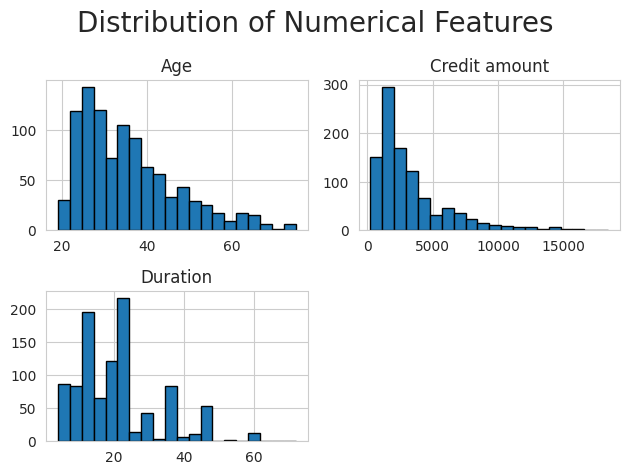

In [ ]:
df[['Age', 'Credit amount', 'Duration']].hist(bins = 20, edgecolor= "black")
plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.tight_layout()
plt.show()

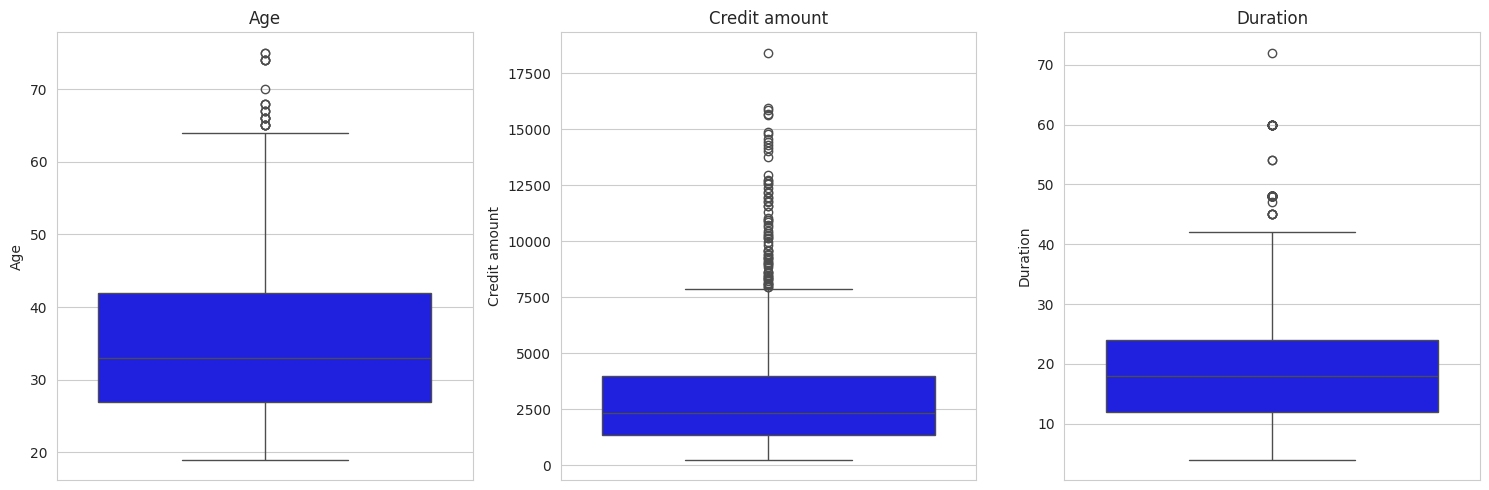

In [ ]:
plt.figure(figsize=(15,5))
for i , col in enumerate(["Age","Credit amount", "Duration" ]):
  plt.subplot(1,3,i+1)
  sns.boxplot(y = df[col], color= "blue")
  plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,NaN,10144,60,radio/TV,good
255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,NaN,NaN,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,NaN,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
672,42,male,3,own,little,NaN,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [ ]:
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Purpose']


/tmp/ipython-input-2077256970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= col, palette= "Set2", order= df[col].value_counts().index)
/tmp/ipython-input-2077256970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= col, palette= "Set2", order= df[col].value_counts().index)
/tmp/ipython-input-2077256970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x= col, palette= "Set2", order= df[col].value_counts().index)
/tmp/ipython-input-2077256970.py:4: FutureWarning: 

Passing `palette` without 

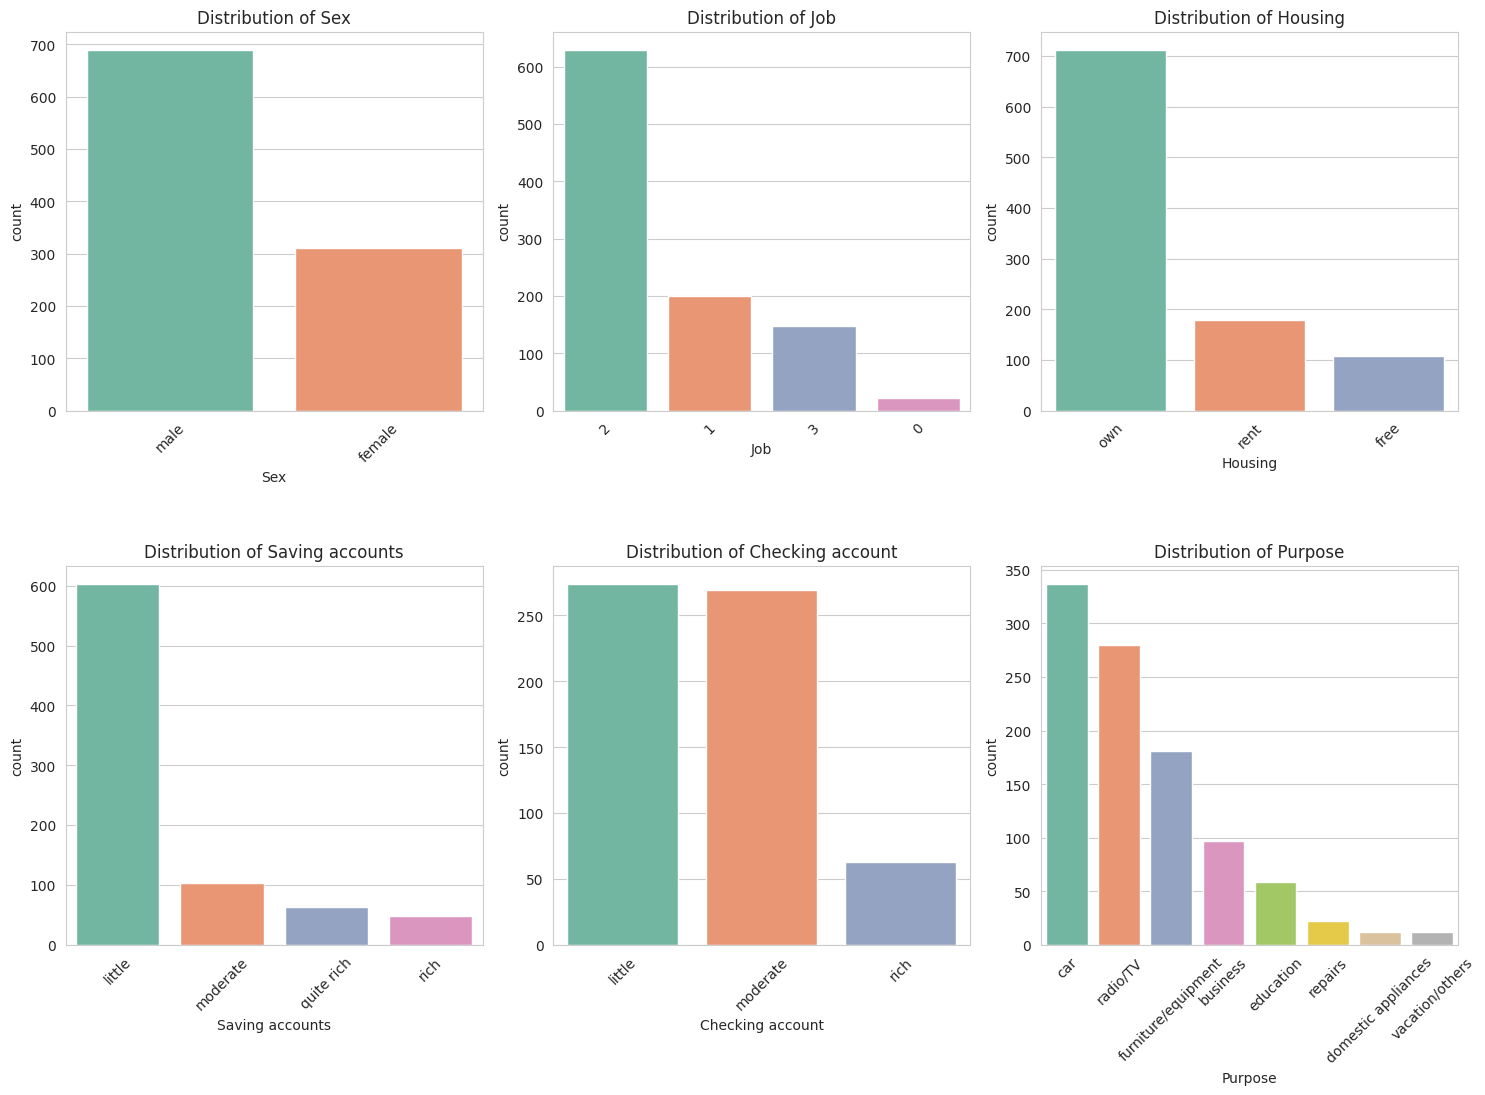

In [ ]:
plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_columns):
  plt.subplot(3,3,i+1)
  sns.countplot(data= df, x= col, palette= "Set2", order= df[col].value_counts().index)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()


In [ ]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

In [ ]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


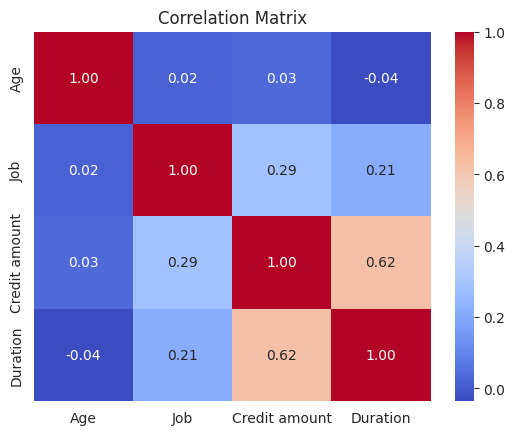

In [ ]:
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt= ".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df.groupby("Job")["Credit amount"].mean()

,Credit amount
Job,
0,2745.136364
1,2358.520000
2,3070.965079
3,5435.493243


In [ ]:
df.groupby("Sex")["Credit amount"].mean()

,Credit amount
Sex,
female,2877.774194
male,3448.040580


In [ ]:
pd.pivot_table(df, index= "Housing", columns= "Purpose", values= "Credit amount",)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


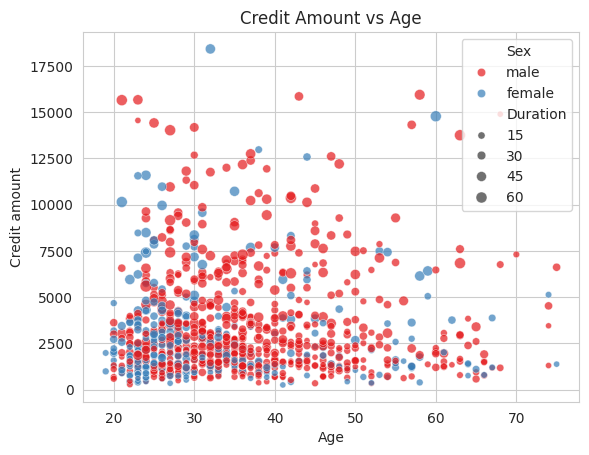

In [ ]:
sns.scatterplot(data= df, x= "Age", y= "Credit amount", hue= "Sex", size= "Duration", alpha= 0.7, palette= "Set1")
plt.title("Credit Amount vs Age")
plt.show()

/tmp/ipython-input-476489463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= df, x= "Saving accounts", y= "Credit amount", palette= "Set2")


Text(0.5, 1.0, 'credit amount distribution by saving account')

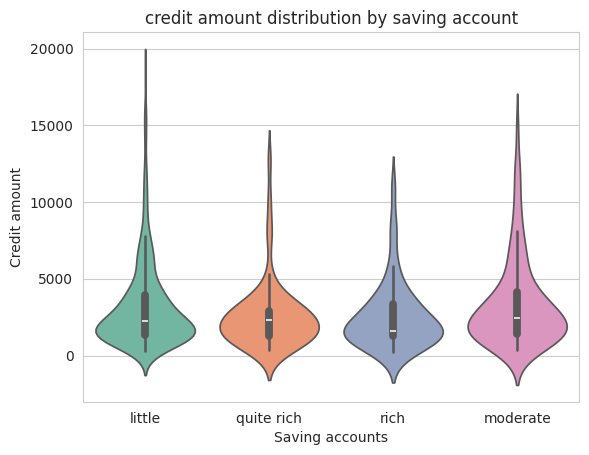

In [ ]:
sns.violinplot(data= df, x= "Saving accounts", y= "Credit amount", palette= "Set2")
plt.title("credit amount distribution by saving account")

In [ ]:
df["Risk"].value_counts(normalize= True) *100

,proportion
Risk,
good,70.0
bad,30.0


/tmp/ipython-input-3889244016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= "Risk", y= col, palette= "Set2")
/tmp/ipython-input-3889244016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= "Risk", y= col, palette= "Set2")
/tmp/ipython-input-3889244016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= "Risk", y= col, palette= "Set2")


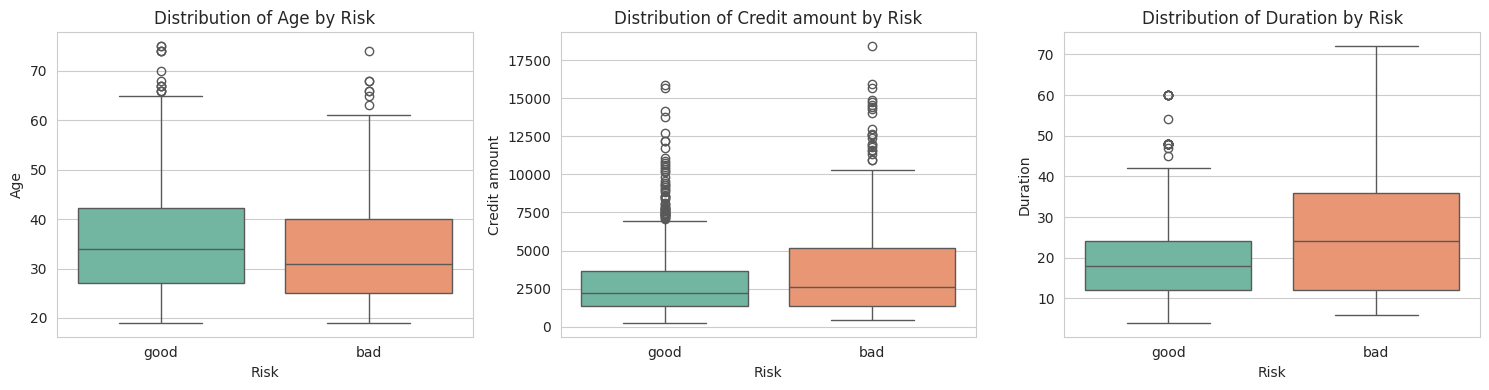

In [ ]:
plt.figure(figsize=(15,4))
for i, col in enumerate(["Age","Credit amount", "Duration"]):
  plt.subplot(1,3,i+1)
  sns.boxplot(data= df, x= "Risk", y= col, palette= "Set2")
  plt.title(f"Distribution of {col} by Risk")
plt.tight_layout()
plt.show()

In [ ]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


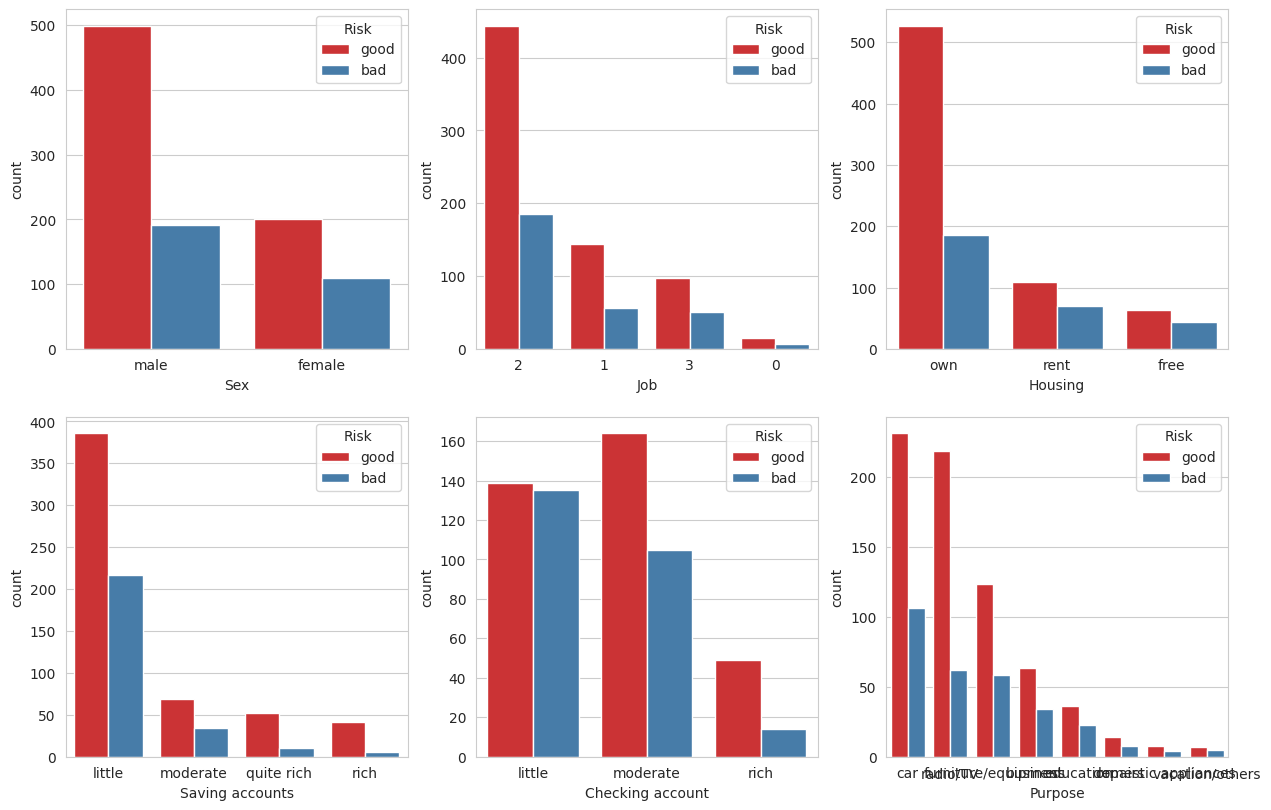

In [ ]:
plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_columns):
  plt.subplot(3, 3, i+1)
  sns.countplot(data= df, x= col, hue= "Risk", palette= "Set1", order= df[col].value_counts().index)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
feachers = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration']

In [ ]:
targrt = "Risk"

In [ ]:
df_model = df[feachers + [targrt]]

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
categorical_columns = df_model.select_dtypes(include= "object").columns.drop("Risk")

In [ ]:
le_dict = {}

In [ ]:
categorical_columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [ ]:
for col in categorical_columns:
  le = LabelEncoder()
  df_model[col] = le.fit_transform(df_model[col])
  le_dict[col] = le
  joblib.dump(le, f"{col}_encoder.pkl")

/tmp/ipython-input-3107890255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col])
/tmp/ipython-input-3107890255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col])
/tmp/ipython-input-3107890255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
le_target = LabelEncoder()

In [ ]:
df_model[targrt] = le_target.fit_transform(df_model[targrt])

/tmp/ipython-input-121555007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[targrt] = le_target.fit_transform(df_model[targrt])


In [ ]:
df_model[targrt].value_counts()

,count
Risk,
1,700
0,300


In [ ]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [ ]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,4,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,3,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [ ]:
x = df_model.drop(targrt, axis = 1)


In [ ]:
y = df_model[targrt]

In [ ]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,4,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,3,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,3,804,12
998,23,1,2,0,0,0,1845,45


In [ ]:
y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


FROM HERE WE ARE SPLITING OUR DATA SET FOR TRAINING AND TESTING WE SET random_state= 42 ACROSS ALL MODEL FOR TO PROVIDE SAME TRAIN SPLIT
OUR TRAINING DATA IS 80% OF ALL DATA SET AND TEST DATA IS 20%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify= y, random_state= 42)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [ ]:
def train_model(model, program_grid, x_train, x_test, y_train, y_test):
  grid = GridSearchCV(model, program_grid, cv= 5, scoring= "accuracy", n_jobs =-1)
  grid.fit(x_train, y_train)
  best_model = grid.best_estimator_
  y_pred = best_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return best_model, accuracy, grid.best_params_

APPLYING DECISION TREE ALGORITHM

In [ ]:
dt = DecisionTreeClassifier(random_state= 42, class_weight = "balanced")
dt_param_grid = {"max_depth": [2,3,10,7, None],
                 "min_samples_split": [2,3,5,10],
                 "min_samples_leaf": [1,2,5,10],

}

TUNING OUR MODEL

In [ ]:
best_dt, accuracy_dt, best_params_dt = train_model(dt, dt_param_grid, x_train, x_test, y_train, y_test)

In [ ]:
print("DT accuracy", accuracy_dt)


DT accuracy 0.655


In [ ]:
print("best parameter DT accuracy", best_params_dt)

best parameter DT accuracy {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


APPLYING RENDOM FOREST ALGORITHM

In [ ]:
rf = RandomForestClassifier(random_state= 42, class_weight= "balanced", n_jobs=-1)

In [ ]:
rf_param_grid = {"n_estimators": [100,200],
                 "max_depth": [2,3,10,7, None],
                 "min_samples_split": [2,5,10],
                 "min_samples_leaf": [1,2,4]

}


TUNING OUR MODEL

In [ ]:
best_rf, accuracy_rf, best_params_rf = train_model(rf, rf_param_grid, x_train, x_test, y_train, y_test)

In [ ]:
print("RF accuracy", accuracy_rf)

RF accuracy 0.75


In [ ]:
print("best parameter RF accuracy", best_params_rf)

best parameter RF accuracy {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


APPLYING XGBOOST CLASSIFIER

In [ ]:
xgb = XGBClassifier(random_state= 42,scale_pos_weight =(y_train == 0).sum()/ (y_train == 1).sum(),use_lebel_encoder= False,eval_matrix = "logloss")

In [ ]:
xgb_param_grid = {"n_estimators": [100,200],
                  "max_depth": [2,3,10,7, None],
                  "learning_rate": [0.01, 0.1, 0.2],
                  "subsample": [0.5, 0.7, 1],
                  "colsample_bytree": [0.5, 0.7, 1]
}

In [ ]:
params_xgb = train_model(xgb, xgb_param_grid, x_train, x_test, y_train, y_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_matrix", "use_lebel_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("XGB accuracy", params_xgb[1])

XGB accuracy 0.72


TILL NOW OUR BEST MODEL IS RENDOM FOREST SO WE WORK WITH THEM

In [ ]:
best_rf.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

EXPORTING OUR MODEL

In [ ]:
joblib.dump(best_rf, "best_rf_model.pkl")

['best_rf_model.pkl']

TO DEMONSTRATE THE MODEL PRACTICALLY, WE DEVELOPED A STREAMLIT APP, MAKING PREDICTION ACCESSIBLE THROUGH A USER-FRIENDLY INTERFACE

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.8 MB/s eta 0:00:00


In [ ]:
!pip install npm

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for npm: filename=npm-0.1.1-py3-none-any.whl size=3682 sha256=50d14dc2c5ba4680e0f0f4fb0c765006d14b9128d75d5ddeda209d7c5556d375
  Stored in directory: /root/.cache/pip/wheels/04/04/bb/36c9ed4d58bad70eebb1210104b60ccc93ccef4253cf5362c3
  Created wheel for optional-django: filename=optional_django-0.1.0-py3-none-any.whl size=9950 sha256=6c7962c6af6e91115c01ed4e15606023b0edd372ef6f13f65e8c79ac30d17e68
  Stored in directory: /root/.cache/pip/wheels/4c/b2/fe/5a41dada2276b894f5f41b2850eab1a1862492b222bfd02e75
Successfully built npm optional-django


this is the password of local tunnel which is required to go to the steamlit interface just copy and paste this ip as password

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.67.194.102


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 

#Project User Manual:

After opening this file

*   Just Upload csv file which we have provided
*   After that upload app.py file which we have provided


*   If you find error in app.py file you just need to Create app.py file and then copy the code which i have provided below and paste it in app.py file.
*   Then rull all code




*   Go to steamlit interface and check model by giving real world data input
*  If there any confusion, feel free to ask 7667013067, 9229194268


please rate this project out of 10

app.py file code just copy and paste it to app.py file

In [ ]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load("best_rf_model.pkl")

# Load the encoders
encoders = {
    'Sex': joblib.load("Sex_encoder.pkl"),
    'Housing': joblib.load("Housing_encoder.pkl"),
    'Saving accounts': joblib.load("Saving accounts_encoder.pkl"),
    'Checking account': joblib.load("Checking account_encoder.pkl")
}

st.title("Credit Risk Assessment")
st.write("Enter the following information to assess credit risk:")

# Streamlit input widgets
age = st.number_input("Age", min_value=18, max_value=70, value=30)
sex = st.selectbox("Sex", ["Male", "Female"])
job = st.number_input("Job (0-3)", min_value=0, max_value=3, value=1)
housing = st.selectbox("Housing", ["Rent", "Own", "Free"])
saving_account = st.selectbox("Saving Account", ["little", "moderate", "rich", "quite rich", "no_saving_account"])
checking_account = st.selectbox("Checking Account", ["little", "moderate", "rich", "quite rich", "no_checking_account"])
credit_amount = st.number_input("Credit Amount", min_value=0, value=1000)
duration = st.number_input("Duration", min_value=1, value=12)

# Prepare input for the model
# Ensure all categorical inputs are converted to lowercase before encoding
input_df = pd.DataFrame({
    "Age": [age],
    "Sex": [encoders["Sex"].transform([sex.lower()])[0]],
    "Job": [job],
    "Housing": [encoders["Housing"].transform([housing.lower()])[0]],
    "Saving accounts": [encoders["Saving accounts"].transform([saving_account.replace(' ', '_').lower()])[0]], # Handle 'no saving account' etc.
    "Checking account": [encoders["Checking account"].transform([checking_account.replace(' ', '_').lower()])[0]], # Handle 'no checking account' etc.
    "Credit amount": [credit_amount],
    "Duration": [duration]
})

if st.button("Predict Risk"):
    prediction = model.predict(input_df)[0]

    if prediction == 1:
        st.write("Credit Risk: Good")
    else:
        st.write("Credit Risk: Bad")
